<a href="https://colab.research.google.com/github/rayrishiraj/OIBSIP/blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERFORMED BY: RISHIRAJ RAY**

Problem Statement:


We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam.

In [ ]:
#importing liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#loading dataset
df = '/content/spam.csv'
import chardet
with open(df, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

In [ ]:
df = pd.read_csv(df,encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#briefing dataset
df.shape

(5572, 5)

In [ ]:
#omitting the columns
df.pop("Unnamed: 2")
df.pop("Unnamed: 3")
df.pop("Unnamed: 4")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
5567    NaN
5568    NaN
5569    NaN
5570    NaN
5571    NaN
Name: Unnamed: 4, Length: 5572, dtype: object

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Renaming the columns
df.columns = ["Category","Mail"]

In [ ]:
df.head()

,Category,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
label=df.Category.value_counts().index
count=df.Category.value_counts().values
print(label)
print(count)

Index(['ham', 'spam'], dtype='object')
[4825  747]


([<matplotlib.patches.Wedge at 0x7fb4e5fadb40>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.6%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.4%')])

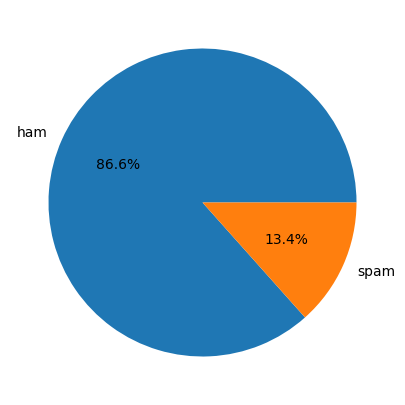

In [ ]:
#Data Visualization
plt.figure(1, figsize=(5,5))
plt.pie(count,labels=label,autopct='%1.1f%%')

In [ ]:
#categorizing
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

In [ ]:
x = df['Mail']
y = df['Category']

In [ ]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
count_0 = (df['Category'] == 0).sum()
count_1 = (df['Category'] == 1).sum()
print(count_0)
print(count_1)

747
4825


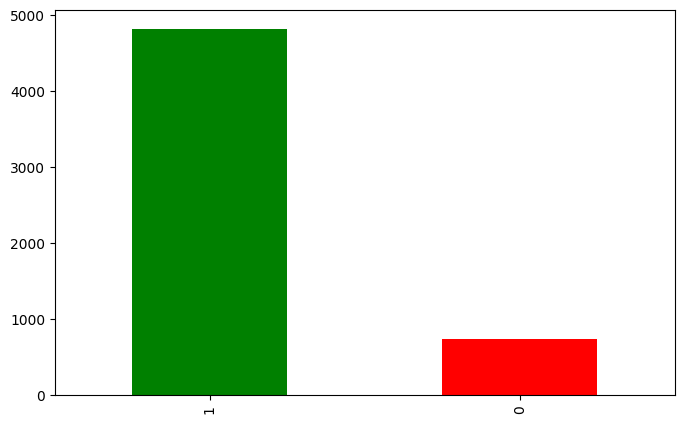

In [ ]:
top = df['Category'].value_counts()
top.plot(kind='bar',figsize=(8,5),color=['green', 'red'])
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
print(x_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Mail, Length: 4457, dtype: object


In [ ]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [ ]:
#training the dataset in Logistic Regression
model = LogisticRegression()
model.fit(x_train_features, y_train)

LogisticRegression()

In [ ]:
# prediction on training data
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [ ]:
# prediction on testing data
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [ ]:
prediction_on_test_data = model.predict(x_test_features)
print("Accuracy: ",accuracy_score(y_test,prediction_on_test_data))
print('\n')

Accuracy:  0.9623318385650225




Building a predictive System to check the ML Algorithm

In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [ ]:
input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
